In [1]:
import isolines as il
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = il.isolines('Prospect Park, Brooklyn, NYC, USA', metric = 'time',values=[3, 6, 9])
df

Finished downloading graph from OSM using osmnx, time elapsed: 8.40807294845581 seconds.


,geometry,time
0,"POLYGON ((-73.9715386842831 40.64928518098171,...",3
1,POLYGON ((-73.97089769124348 40.64706842785699...,6
2,POLYGON ((-73.97041657614054 40.64487669090185...,9


Finished downloading graph from OSM using osmnx, time elapsed: 105.89525890350342 seconds.


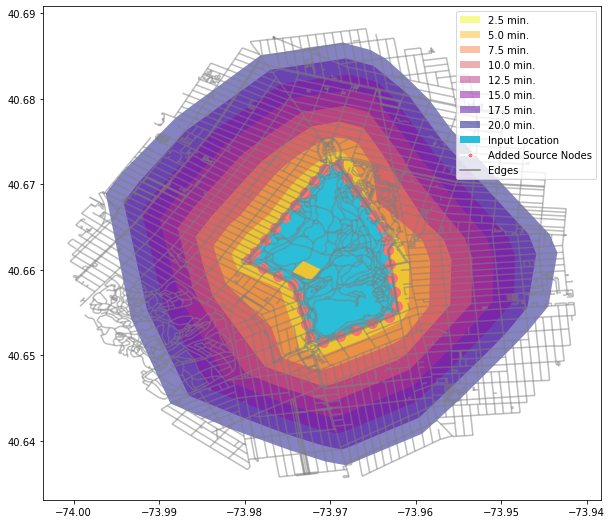

In [7]:
iso = il.OsmIsolines('Prospect Park, Brooklyn, NYC, USA', metric = 'time', values=np.arange(2.5, 22.5, 2.5), unit = 'ft', sample = 600, knn = 50)
iso.plot_isolines(figsize = (10, 10))

Finished downloading graph from OSM using osmnx, time elapsed: 216.61540389060974 seconds.


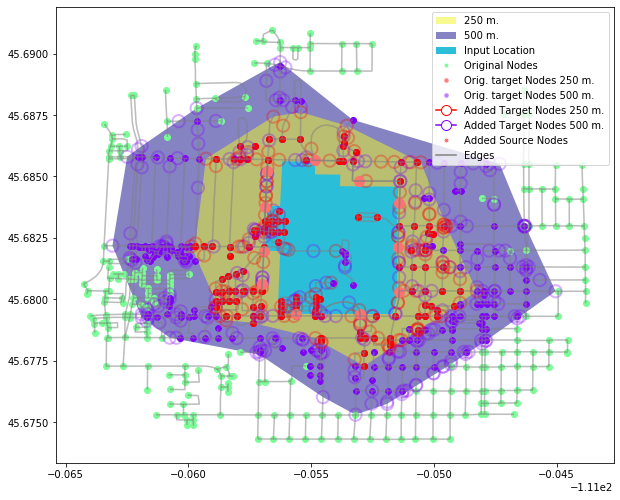

In [8]:
iso = il.OsmIsolines('Bozeman High School, Bozeman, Montana, USA',values=[250, 500],sample = 200)
iso.plot_isolines(plot_nodes=True, plot_source_nodes=True,figsize = (10,10))

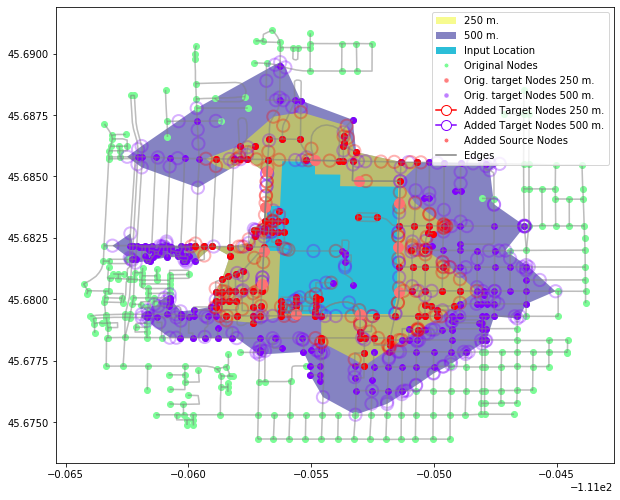

In [12]:
iso.change_isolines(knn = 15)
iso.plot_isolines(plot_nodes=True, plot_source_nodes=True,figsize = (10,10))

Finished downloading graph from OSM using osmnx, time elapsed: 10.405979633331299 seconds.


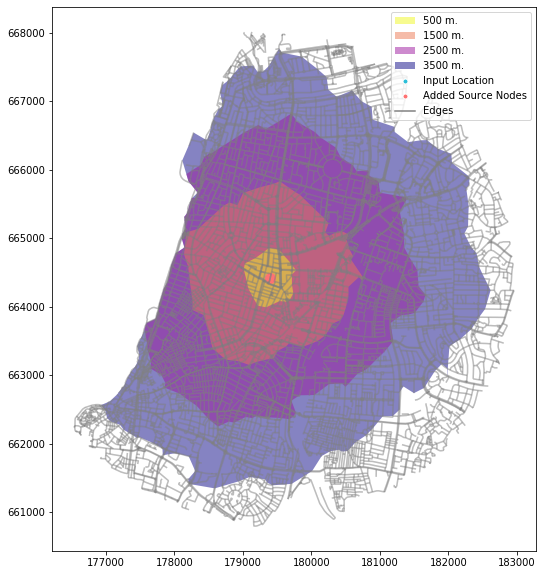

In [18]:
from shapely.geometry import Point
isochrones = il.OsmIsolines(Point(179370.985,664422.488),
                                 network_type = 'walk',
                                 values=[500, 1500, 2500, 3500],
                                 crs = 2039,
                                 knn = 25)
isochrones.plot_isolines(figsize = (10, 10))

/media/ml/ex1/my_repos/isolines/isolines/core.py:353: Warning: Some of the values are larger than the maximum value set on the Isolines (3500 m). New Isolines will be calculated for the maximum value set on the instance. Alternatively, re-initiate the Isolines with a larger maximum value.
  Warning)


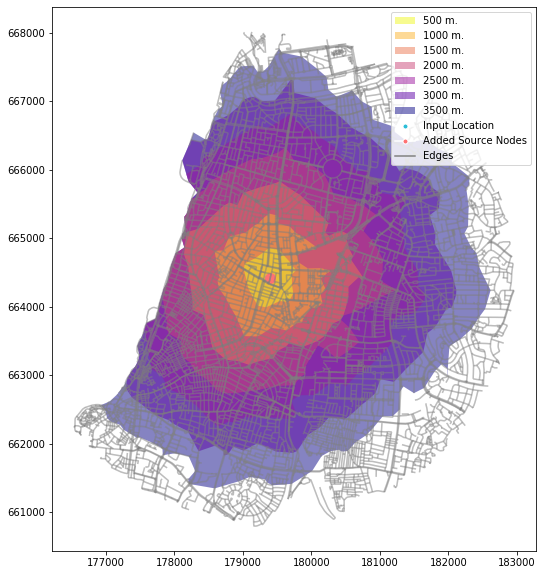

In [19]:
isochrones.add_isolines([1000, 2000, 3000, 4000])
isochrones.plot_isolines(figsize = (10, 10))

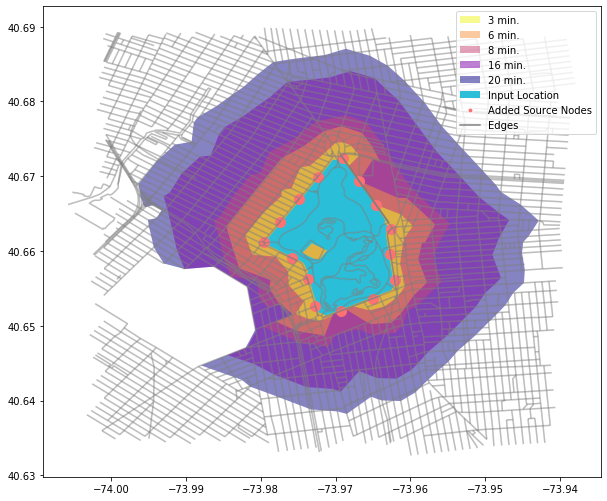

In [22]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString
df = gpd.GeoDataFrame.from_file('../data/tl_2019_36047_edges/tl_2019_36047_edges.shp')
# pre-process: add edges in the opposite direction 
df2 = df.copy()
df2['TNIDF'] = df['TNIDT'].copy()
df2['TNIDT'] = df['TNIDF'].copy()
# reverse the line geometry coordinate sequence
df2['geometry'] = df['geometry'].apply(lambda x: LineString(x.coords[::-1]))
df = pd.concat([df, df2]).reset_index(drop = True)
tiger = il.GpdIsolines('Prospect Park, Brooklyn, NYC, USA',
                            edges = df,
                            network_type = 'walk',
                            metric = 'time',
                            values=[3, 6, 8, 16, 20],
                            edge_idcol = 'TLID', 
                            fromcol = 'TNIDF',
                            tocol = 'TNIDT',
                            sample= 400,
                            knn = 25
                                 )

tiger.plot_isolines(figsize = (10, 10))